In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# **RESEARCH QUESTIONS**
# WHAT IS THE MOST POPULAR BREED AS A PET DOG? WHAT IS THE MOST COMMON NAME? WHAT IS THE GENDER THAT IS MOST PREFERRED BY THE PET OWNERS? DO NEW YORKERS HAVE BIASED PREJUDICE AGAINST PITBULLS? ARE THERE ANY TIBETAN MASTIFFS IN NEW YORK?
My goal for this analysis is to find out the most common breed and gender of the dog that are adopted by the owners. I am planning to adopt a dog myself so I chose this data set for the analysis. This analysis will help illucidate what breed and gender of the dog is mostly preferred by general. I also wanted to know if New Yorkers own Tibetan Mastiffs which is considered luxury in countries in China where it is sold at high value.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NYC_Dog_Licensing_Dataset.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,RowNumber,AnimalName,AnimalGender,AnimalBirthMonth,BreedName,Borough,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year,Unique Dog ID
0,1,PAIGE,F,2014,American Pit Bull Mix / Pit Bull Mix,NaN,10035,09/12/2014,09/12/2017,2016.0,NaN
1,2,YOGI,M,2010,Boxer,NaN,10465,09/12/2014,10/02/2017,2016.0,NaN
2,3,ALI,M,2014,Basenji,NaN,10013,09/12/2014,09/12/2019,2016.0,NaN
3,4,QUEEN,F,2013,Akita Crossbreed,NaN,10013,09/12/2014,09/12/2017,2016.0,NaN
4,5,LOLA,F,2009,Maltese,NaN,10028,09/12/2014,10/09/2017,2016.0,NaN


In [ ]:
df.describe

<bound method NDFrame.describe of         RowNumber AnimalName  ... Extract Year  Unique Dog ID
0               1      PAIGE  ...       2016.0            NaN
1               2       YOGI  ...       2016.0            NaN
2               3        ALI  ...       2016.0            NaN
3               4      QUEEN  ...       2016.0            NaN
4               5       LOLA  ...       2016.0            NaN
...           ...        ...  ...          ...            ...
493067     147341    UNKNOWN  ...          NaN            NaN
493068     147342    UNKNOWN  ...          NaN            NaN
493069     147343    UNKNOWN  ...          NaN            NaN
493070     147344    UNKNOWN  ...          NaN            NaN
493071     147345    UNKNOWN  ...          NaN            NaN

[493072 rows x 11 columns]>

In [ ]:
df.columns

Index(['RowNumber', 'AnimalName', 'AnimalGender', 'AnimalBirthMonth',
       'BreedName', 'Borough', 'ZipCode', 'LicenseIssuedDate',
       'LicenseExpiredDate', 'Extract Year', 'Unique Dog ID'],
      dtype='object')

In [ ]:
df.notnull

<bound method DataFrame.notnull of         RowNumber AnimalName  ... Extract Year  Unique Dog ID
0               1      PAIGE  ...       2016.0            NaN
1               2       YOGI  ...       2016.0            NaN
2               3        ALI  ...       2016.0            NaN
3               4      QUEEN  ...       2016.0            NaN
4               5       LOLA  ...       2016.0            NaN
...           ...        ...  ...          ...            ...
493067     147341    UNKNOWN  ...          NaN            NaN
493068     147342    UNKNOWN  ...          NaN            NaN
493069     147343    UNKNOWN  ...          NaN            NaN
493070     147344    UNKNOWN  ...          NaN            NaN
493071     147345    UNKNOWN  ...          NaN            NaN

[493072 rows x 11 columns]>

In [ ]:
df.tail

<bound method NDFrame.tail of         RowNumber AnimalName  ... Extract Year  Unique Dog ID
0               1      PAIGE  ...       2016.0            NaN
1               2       YOGI  ...       2016.0            NaN
2               3        ALI  ...       2016.0            NaN
3               4      QUEEN  ...       2016.0            NaN
4               5       LOLA  ...       2016.0            NaN
...           ...        ...  ...          ...            ...
493067     147341    UNKNOWN  ...          NaN            NaN
493068     147342    UNKNOWN  ...          NaN            NaN
493069     147343    UNKNOWN  ...          NaN            NaN
493070     147344    UNKNOWN  ...          NaN            NaN
493071     147345    UNKNOWN  ...          NaN            NaN

[493072 rows x 11 columns]>

In [ ]:
df.shape


(493072, 11)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493072 entries, 0 to 493071
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   RowNumber           493072 non-null  int64  
 1   AnimalName          492010 non-null  object 
 2   AnimalGender        493050 non-null  object 
 3   AnimalBirthMonth    493072 non-null  int64  
 4   BreedName           493072 non-null  object 
 5   Borough             0 non-null       float64
 6   ZipCode             493072 non-null  int64  
 7   LicenseIssuedDate   493072 non-null  object 
 8   LicenseExpiredDate  493007 non-null  object 
 9   Extract Year        345727 non-null  float64
 10  Unique Dog ID       0 non-null       float64
dtypes: float64(3), int64(3), object(5)
memory usage: 41.4+ MB


# ***BOROUGH INFORMATION IS COMPLETELY MISSING SO WE CAN ONLY ON THE ZIPCODE FOR THE AREA AND DEMOGRAPHIC INFORMATION.***

In [ ]:
df.isnull().sum()

RowNumber                  0
AnimalName              1062
AnimalGender              22
AnimalBirthMonth           0
BreedName                  0
Borough               493072
ZipCode                    0
LicenseIssuedDate          0
LicenseExpiredDate        65
Extract Year          147345
Unique Dog ID         493072
dtype: int64

# **GENDER RATIO OF THE PET**

This shows that more male dogs are adopted by 9.23%. Even though male dogs are more likely to adopted than female by 9%, the difference is not that astounding. 

In [ ]:
df['AnimalGender'].value_counts()

M    269278
F    223772
Name: AnimalGender, dtype: int64

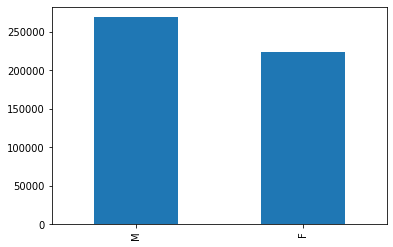

In [ ]:
df["AnimalGender"].value_counts().plot.bar()

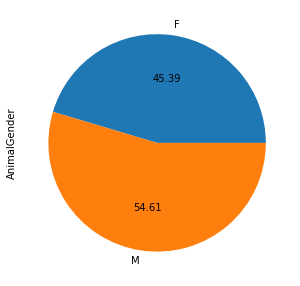

In [ ]:
df.groupby('AnimalGender')['AnimalGender'].count().plot.pie(autopct='%.2f',figsize=(5,5))

In [ ]:
M = 269278
F = 223772
Diff_cal = (M-F)
print(Diff_cal)
Total = (M+F)
print(Total)
Percent = (45506/493050)*100
print(Percent)


45506
493050
9.229489909745462


# **BREED**

*Based on this result, the most common breed that are registered is Yorkshire Terrier followed by Shih Tzu, Chihuahua and Maltese respectively. I am not surprised because my personal favourite is Yorkie as they are small in stature and perfect for apartment living. I want to see the numbers of big dogs living in New York such as Pitbull and German Shepard.

In [ ]:
df['BreedName'].value_counts()

Unknown                54586
Yorkshire Terrier      30379
Shih Tzu               27407
Chihuahua              21211
Maltese                15701
                       ...  
Portuguese Sheepdog        1
Swedish Lapphund           1
Kishu Ken                  1
Tornjak                    1
Stabyhoun                  1
Name: BreedName, Length: 329, dtype: int64

# **TOP TEN DOGS**
Since the information is hidden above and cannot view more than the top 5 and bottom five. I wanted to see the top five use the head() function. It shows that American Pitbul and mix are sixth most common type of breed adopted by New Yorkers. This shows that New Yorker are prejudiced with stigma of pitbulls being unpredicatable and dangerous. 

In [ ]:
df["BreedName"].value_counts().head(11)

Unknown                                 54586
Yorkshire Terrier                       30379
Shih Tzu                                27407
Chihuahua                               21211
Maltese                                 15701
Labrador Retriever                      15666
American Pit Bull Mix / Pit Bull Mix    13681
Labrador Retriever Crossbreed           12733
American Pit Bull Terrier/Pit Bull      10712
Pomeranian                               9287
Havanese                                 8606
Name: BreedName, dtype: int64

# **THE MOST COMMON NAMES OF THE PETS**

Based on the data provided by NYC, the most common name for the female are Bella followed by Max and Charlie for male dogs subsequently. So, I will avoid these names when I name my dog. Desameau which only has one number seems more unique. 

In [ ]:
df['AnimalName'].value_counts()

UNKNOWN              9344
BELLA                5508
NAME NOT PROVIDED    5054
MAX                  4930
CHARLIE              4021
                     ... 
KOSELA                  1
KILE                    1
ONIKA                   1
MULLLIKIN               1
DESAMEAU                1
Name: AnimalName, Length: 26939, dtype: int64

# ***Excluding the unrecorded names, the top ten pet names are:***


1. Bella
2. Max
3. Charlie
4. Coco
5. Lola
6. Rocky
7. Luna
8. Lucy
9. Buddy
10. Lucky *italicized text*





In [ ]:
df["AnimalName"].value_counts().head(12)

UNKNOWN              9344
BELLA                5508
NAME NOT PROVIDED    5054
MAX                  4930
CHARLIE              4021
COCO                 3697
LOLA                 3491
ROCKY                3418
LUNA                 3230
LUCY                 3012
BUDDY                2758
LUCKY                2717
Name: AnimalName, dtype: int64

In [ ]:
df.replace("NaN", "")

,RowNumber,AnimalName,AnimalGender,AnimalBirthMonth,BreedName,Borough,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year,Unique Dog ID
0,1,PAIGE,F,2014,American Pit Bull Mix / Pit Bull Mix,NaN,10035,09/12/2014,09/12/2017,2016.0,NaN
1,2,YOGI,M,2010,Boxer,NaN,10465,09/12/2014,10/02/2017,2016.0,NaN
2,3,ALI,M,2014,Basenji,NaN,10013,09/12/2014,09/12/2019,2016.0,NaN
3,4,QUEEN,F,2013,Akita Crossbreed,NaN,10013,09/12/2014,09/12/2017,2016.0,NaN
4,5,LOLA,F,2009,Maltese,NaN,10028,09/12/2014,10/09/2017,2016.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
493067,147341,UNKNOWN,F,2020,Poodle Crossbreed,NaN,10025,03/17/2021,03/17/2022,NaN,NaN
493068,147342,UNKNOWN,F,2020,"Coonhound, Treeing Walker",NaN,11201,03/17/2021,03/17/2022,NaN,NaN
493069,147343,UNKNOWN,M,2020,Dachshund,NaN,11206,03/17/2021,03/17/2022,NaN,NaN
493070,147344,UNKNOWN,M,2020,Goldendoodle,NaN,10019,03/17/2021,03/17/2022,NaN,NaN


# DEMOGRAPHICS OF THE ZIPCODE WITH HIGHEST NUMBER OF PETS SHOWS SIGNS OF HIGH POPULATION DENSITY
According to United State Zipcode Organization (2022),"Stats and Demographics for the 10025 ZIP Code
ZIP code 10025 is located in southeast New York and covers a slightly less than average land area compared to other ZIP codes in the United States. It also has an extremely large population density.

The people living in ZIP code 10025 are primarily white. The number of people in their late 20s to early 40s is extremely large while the number of young adults is large. There are also an extremely large number of single adults and an extremely small number of families. The percentage of children under 18 living in the 10025 ZIP code is extremely small compared to other areas of the country.

For more information, see New York, NY households.

Population	94,600	
Population Density	125,860	people per sq mi
Housing Units	47,617	
Median Home Value	$934,600
Land Area	0.75	sq mi

Water Area	0.00	sq mi
Occupied Housing Units	44,432	
Median Household Income	$68,516	". 
bold text
You can also access the page by clicking on the link. https://www.unitedstateszipcodes.org/10025/


In [ ]:
df['ZipCode'].value_counts().tail(10)

7033     1
11388    1
121      1
8823     1
10859    1
7022     1
2668     1
6511     1
10601    1
0        1
Name: ZipCode, dtype: int64

In [ ]:
df['ZipCode'].value_counts().head(10)

10025    11300
10023     8980
10024     8735
10011     8622
11215     8544
11201     8538
10128     8196
10009     8190
10314     7433
10312     7167
Name: ZipCode, dtype: int64

# ***ZIPCODE 10601 WITH ONLY 1 REGISTERED PET SHOWS THE SIGN OF LESS POPULATION DENSITY***

Stats and Demographics for the 10601 ZIP Code
ZIP code 10601 is located in southeast New York and covers a slightly less than average land area compared to other ZIP codes in the United States. It also has an extremely large population density.

The people living in ZIP code 10601 are primarily white. The number of people in their late 20s to early 40s is extremely large while the number of seniors is slightly higher than average. There are also an extremely large number of single adults and an extremely small number of families. The percentage of children under 18 living in the 10601 ZIP code is small compared to other areas of the country.

Population	11,376	
Population Density	17,965	people per sq mi
Housing Units	6,127	
Median Home Value	$316,900	

Land Area	0.63	sq mi
Water Area	0.00	sq mi
Occupied Housing Units	5,588	
Median Household Income	$67,754	

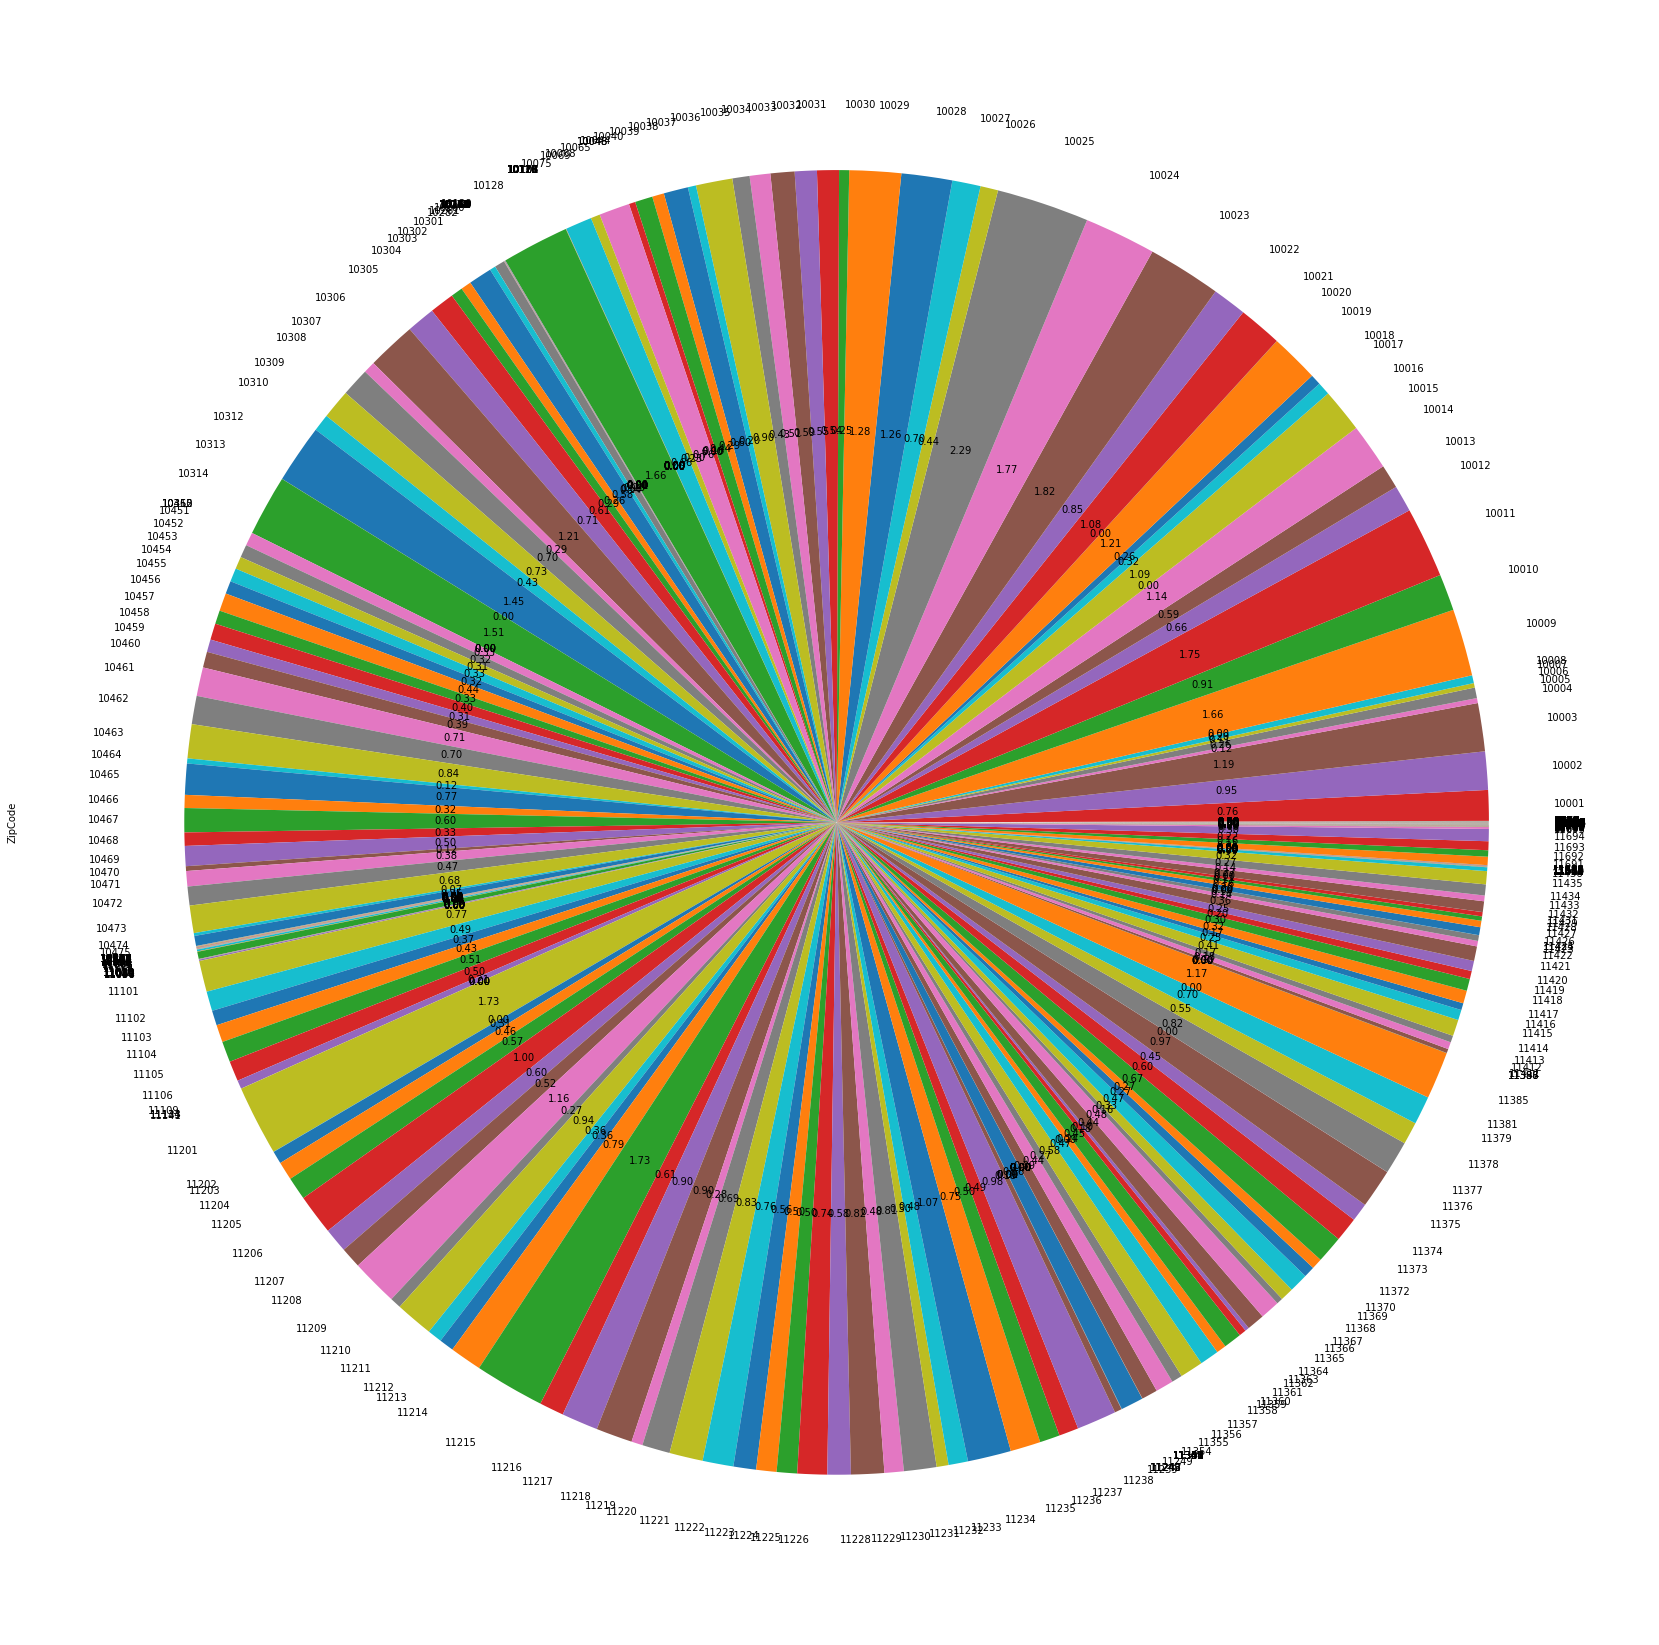

In [ ]:
df.groupby('ZipCode')['ZipCode'].count().plot.pie(autopct='%.2f',figsize=(30,30))

By this column, I can see that my zipcode 11373 amounts to 0.60% in the overall percentage of the registered pets.

#** DROPPING THE UNWANTED COLUMNS**

In [ ]:
df1 = df.drop(['RowNumber','AnimalBirthMonth','Borough','LicenseIssuedDate','LicenseExpiredDate', 'Extract Year', 'Unique Dog ID'], axis=1, inplace=True)

In [ ]:
df.sort_values(by=['BreedName','AnimalGender','AnimalName','ZipCode'], ascending=False)

,AnimalName,AnimalGender,BreedName,ZipCode
471998,ZORO,M,Yorkshire Terrier Crossbreed,11236
319169,ZOOSK,M,Yorkshire Terrier Crossbreed,11365
27676,ZIGGY,M,Yorkshire Terrier Crossbreed,11432
161909,ZIGGY,M,Yorkshire Terrier Crossbreed,11368
241372,ZIGGY,M,Yorkshire Terrier Crossbreed,11368
...,...,...,...,...
159946,BIGGIE,F,Affenpinscher,10005
330499,BIGGIE,F,Affenpinscher,10005
105652,ANNIE,F,Affenpinscher,10065
150337,ANNIE,F,Affenpinscher,10065


# **SETTING CONDITIONS TO SELECT ONLY CERTAIN BREED FROM THE BREED NAME COLUMN**

*THERE ARE TOTAL NUMBER OF 13681 pitbulls in New York City. More interestingly I was able to find out that there are 26 Tibetan Mastiff in New York which is amazing. I have always been fascinated by Tibetan Mastiff which have high value in market.*

In [ ]:
Pitbull = df[df["BreedName"] == "American Pit Bull Mix / Pit Bull Mix"]
print (Pitbull)

       AnimalName AnimalGender                             BreedName  ZipCode
0           PAIGE            F  American Pit Bull Mix / Pit Bull Mix    10035
15         MURPHY            M  American Pit Bull Mix / Pit Bull Mix    10463
59          CHLOE            F  American Pit Bull Mix / Pit Bull Mix    10029
60         TWIGGY            F  American Pit Bull Mix / Pit Bull Mix    10029
61            MAX            M  American Pit Bull Mix / Pit Bull Mix    10029
...           ...          ...                                   ...      ...
492686      COMET            M  American Pit Bull Mix / Pit Bull Mix    11102
492782    UNKNOWN            M  American Pit Bull Mix / Pit Bull Mix    11238
492909    UNKNOWN            M  American Pit Bull Mix / Pit Bull Mix    11228
492913    UNKNOWN            M  American Pit Bull Mix / Pit Bull Mix    11209
492929     SLEAVY            M  American Pit Bull Mix / Pit Bull Mix    11249

[13681 rows x 4 columns]


In [ ]:
df[df["BreedName"] == "American Pit Bull Mix / Pit Bull Mix"].count()

AnimalName      13681
AnimalGender    13681
BreedName       13681
ZipCode         13681
dtype: int64

In [ ]:
Pit = 13681
Total_dog = 493072
Per_Pit = (13681/493072)*100
print(Per_Pit)

2.774645487880066


In [ ]:
Yorkie = 30379
Per_York = (30379/493072)*100
print(Per_York)

6.161169159879288


In [ ]:
Tibet = 26
Per_Tib = (26/493072)*100
print(Per_Tib)

0.005273063568809424


In [ ]:
other_dogs =100-(Per_Pit+Per_York+Per_Tib)
print(other_dogs)

91.05891228867183


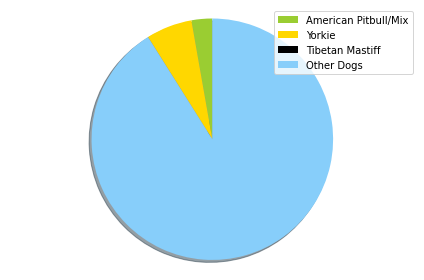

In [ ]:
labels = ['American Pitbull/Mix', 'Yorkie', "Tibetan Mastiff", "Other Dogs"]
sizes = [2.774645487880066, 6.161169159879288 , 0.005273063568809424, 91.06418535224064 ]
colors = ['yellowgreen', 'gold', "black", 'lightskyblue']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
explode = (0.1, 0, 0, 0)  # explode 1st slic
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
Mastiff = df[df["BreedName"] == "Tibetan Mastiff"]
print (Mastiff)

       AnimalName AnimalGender        BreedName  ZipCode
15785      HUNTER            F  Tibetan Mastiff    11204
25898       KEVIN            M  Tibetan Mastiff    10472
32466       WHITE            M  Tibetan Mastiff    10456
32492        BLUE            M  Tibetan Mastiff    10456
38202       CHEBA            M  Tibetan Mastiff    11368
119449      CHEBA            M  Tibetan Mastiff    11368
160483          A            F  Tibetan Mastiff    10472
160524          A            F  Tibetan Mastiff    10472
160543          A            M  Tibetan Mastiff    10472
180614     HUNTER            F  Tibetan Mastiff    11204
214120      DUTCH            M  Tibetan Mastiff    11420
221163        BOB            M  Tibetan Mastiff    10309
221164       SARA            F  Tibetan Mastiff    10309
226600     BRUTUS            M  Tibetan Mastiff    11215
240642          A            F  Tibetan Mastiff    10472
240654          A            M  Tibetan Mastiff    10472
240667          A            F 

In [ ]:
df[df["BreedName"] == "Tibetan Mastiff"].count()

AnimalName      26
AnimalGender    26
BreedName       26
ZipCode         26
dtype: int64

In [ ]:
df[df["ZipCode"] == "11373"]


,AnimalName,AnimalGender,BreedName,ZipCode


In [ ]:
df[df["ZipCode"] == "11373"].count()

AnimalName      0
AnimalGender    0
BreedName       0
ZipCode         0
dtype: int64

In [ ]:
df[df["ZipCode"] == "10025"]
print (Zip_10023)

Empty DataFrame
Columns: [AnimalName, AnimalGender, BreedName, ZipCode]
Index: []


# ***Gender ratio in Pitbulls***

Out of 13681 pitbulls in New York, 7073 are female which is more in number than males. Male amounts to 48.30 of the overall population. So, we can safely derive that female pitbulls are slightly more preferable by most.

In [ ]:
 df.loc[(df["AnimalGender"] == "F") & (df["BreedName"] == "American Pit Bull Mix / Pit Bull Mix")]

,AnimalName,AnimalGender,BreedName,ZipCode
0,PAIGE,F,American Pit Bull Mix / Pit Bull Mix,10035
59,CHLOE,F,American Pit Bull Mix / Pit Bull Mix,10029
60,TWIGGY,F,American Pit Bull Mix / Pit Bull Mix,10029
91,KIMBERLY,F,American Pit Bull Mix / Pit Bull Mix,11230
102,MOLLIE,F,American Pit Bull Mix / Pit Bull Mix,11228
...,...,...,...,...
492357,UNKNOWN,F,American Pit Bull Mix / Pit Bull Mix,11218
492387,BROOKLYN,F,American Pit Bull Mix / Pit Bull Mix,10034
492436,UNKNOWN,F,American Pit Bull Mix / Pit Bull Mix,11216
492511,UNKNOWN,F,American Pit Bull Mix / Pit Bull Mix,11221


In [ ]:
Total_pit = 13681
F_pit = 7073
M_pit = (Total_pit - F_pit)
print(M_pit)
per_M = (6608/13681)*100
print(per_M)

6608
48.30056282435494


# ***Conclusion and summary of the analysis***
The most common type of adopted dogs are Yorkshire Terrier. In general, there are more male pet dogs than female, exceeding by only 9.2%, which I believe is not that significant. I came to find out that pitbull ranks in number six in the most common breed registered which cancels out my doubt of prejudice againt pitbull by New Yorkers. I was hesistant to adopt pitbulls before but this changes my outlook and look forward to adopt one. Unlike the general gender ratio, female pitbulls outnumber male pitbull by 1.70%. I was also surprised that there not only one but 26 Tibetan Mastiffs in New York! 
